# Nicolaus Copernicus University summer internship project 
## Natural Language Processing applied to ancient language texts

We aim to investigate the implementation of a general pipeline to extract qualitative and quantitative information from Latin texts employing ML algorithms. In particular, our approach focuses on detecting similarities between texts of the same author. For instance, it could
be beneficial to classify authors according to writing styles or historical ages, as well as to recognize the author of anonymous documents with a certain probability. \\

Finally, we propose a network representation that aims to capture and represent these similarities, and we quantify the degree of relationship by computing a similarity index.

In [2]:
#Import the necessary libraries
import re
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn import metrics
import pandas as pd
#import cltk
#from cltk import embeddings
import sys
import os
import umap
import umap.plot
import numpy as np
import networkx as nx
import pickle


In [3]:
source='/home/wsojka00/Desktop/LatinBERT/pickle'
auth=[]
vector=[]
sentence=[]
for file in os.listdir(source):
    dbfile = open(source+'/'+file,'rb')     
    db = pickle.load(dbfile)
    for i in range(len(db.keys())):
        auth.append(str(db[i][0]).replace('corpus2/',''))
        vector.append(db[i][2])
        sentence.append(str(db[i][1]).replace('[CLS]','').replace('[SEP]',''))
X=np.array(vector)
np.shape(X)

(35078, 768)

22

# Cosine similarity

In [3]:
cos=pd.DataFrame(metrics.pairwise.cosine_similarity(X))
cos

0         1         2         3         4         5         6      \
0      1.000000  0.783468  0.701981  0.704169  0.705750  0.717391  0.690284   
1      0.783468  1.000000  0.829031  0.771858  0.712631  0.773677  0.863706   
2      0.701981  0.829031  1.000000  0.790710  0.722367  0.805470  0.805905   
3      0.704169  0.771858  0.790710  1.000000  0.761088  0.887029  0.756832   
4      0.705750  0.712631  0.722367  0.761088  1.000000  0.797890  0.645757   
...         ...       ...       ...       ...       ...       ...       ...   
35073  0.719602  0.768991  0.804202  0.856951  0.772634  0.822238  0.754649   
35074  0.732391  0.740582  0.714372  0.786933  0.801627  0.827794  0.651450   
35075  0.693058  0.780817  0.746707  0.826793  0.736650  0.789043  0.773974   
35076  0.626505  0.730761  0.726606  0.758642  0.664165  0.717159  0.779522   
35077  0.679839  0.754630  0.729239  0.841291  0.771838  0.830263  0.710780   

          7         8         9      ...     35068     35069     35070  \
0      0.721180  0.716560  0.766482  ...  0.688305  0.665178  0.651926   
1      0.862231  0.867779  0.860167  ...  0.730241  0.696205  0.755013   
2      0.862383  0.870946  0.847399  ...  0.747425  0.736363  0.744749   
3      0.810614  0.761463  0.833626  ...  0.812736  0.803589  0.819099   
4      0.748481  0.684364  0.756083  ...  0.803349  0.763966  0.734811   
...         ...       ...       ...  ...       ...       ...       ...   
35073  0.797267  0.756872  0.797099  ...  0.832593  0.812370  0.870233   
35074  0.725399  0.666952  0.750734  ...  0.825967  0.796492  0.763659   
35075  0.766588  0.760218  0.770925  ...  0.807933  0.747113  0.884509   
35076  0.733444  0.776025  0.729965  ...  0.757416  0.703741  0.850200   
35077  0.762200  0.721435  0.788059  ...  0.827700  0.823309  0.876093   

          35071     35072     35073     35074     35075     35076     35077  
0      0.686742  0.678775  0.719602  0.732391  0.693058  0.626505  0.679839  
1      0.759761  0.721445  0.768991  0.740582  0.780817  0.730761  0.754630  
2      0.777158  0.765757  0.804202  0.714372  0.746707  0.726606  0.729239  
3      0.804150  0.800850  0.856951  0.786933  0.826793  0.758642  0.841291  
4      0.791834  0.736664  0.772634  0.801627  0.736650  0.664165  0.771838  
...         ...       ...       ...       ...       ...       ...       ...  
35073  0.880587  0.856260  1.000000  0.798201  0.867965  0.800294  0.831722  
35074  0.802907  0.796349  0.798201  1.000000  0.770979  0.691064  0.793298  
35075  0.844125  0.845483  0.867965  0.770979  1.000000  0.905812  0.871140  
35076  0.823071  0.834273  0.800294  0.691064  0.905812  1.000000  0.828832  
35077  0.856887  0.774608  0.831722  0.793298  0.871140  0.828832  1.000000  

[35078 rows x 35078 columns]

In [7]:
np.array(cos).min()

0.3596156

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(cos)

KeyboardInterrupt: 

# Data visualization - UMAP

/home/wsojka00/.local/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/wsojka00/.local/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/wsojka00/.local/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/wsojka00/.local/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spe

<AxesSubplot:>

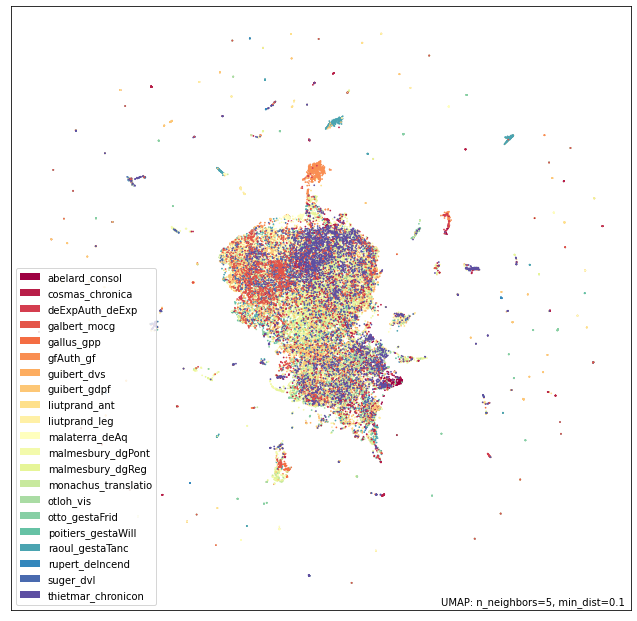

In [6]:
#dimensionality reduction with UMAP and graphical representation - plot 1
mapper = umap.UMAP(random_state=42, n_components=2, metric='euclidean', n_neighbors=5).fit(X)
umap.plot.points(mapper, labels=np.array(auth))

<AxesSubplot:>

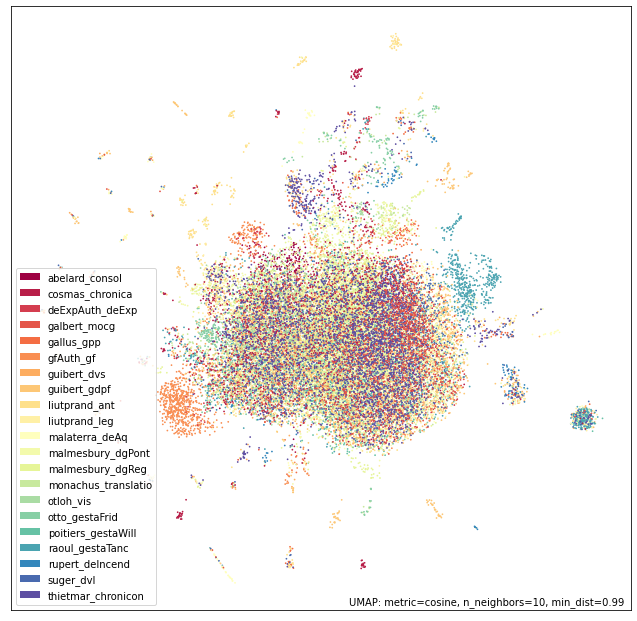

In [8]:
#dimensionality reduction with UMAP and graphical representation - plot 2, different parameters
mapper = umap.UMAP(random_state=42, n_components=2, metric='cosine',n_neighbors=10, min_dist=0.99).fit(X)
umap.plot.points(mapper, labels=np.array(auth))

# Multiclass classification

In [10]:
#import the machine learning libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import rand_score

### Clustering with K-means

In [11]:
kmeans_labels = KMeans(random_state=0, n_clusters=len(os.listdir(source))).fit_predict(X)  #mapper.transform(X)
#kmeans_labels

array([20,  0, 17, ...,  4,  4,  5], dtype=int32)

In [14]:
kmeans_labels = KMeans(random_state=0, n_clusters=len(os.listdir(source))).fit_predict(mapper.transform(X))  #mapper.transform(X)
#kmeans_labels

In [15]:
rand_score(kmeans_labels,auth)

0.879870988881761

### Model selection - supervised

In [16]:
X=mapper.transform(X)

In [17]:
y=np.array(auth)

In [18]:
clf = OneVsRestClassifier(SVC())
scores = cross_val_score(clf, X, y, cv=5)
scores, np.mean(scores)

(array([0.10989168, 0.11473774, 0.12157925, 0.12858161, 0.10306486]),
 0.11557102755050871)

In [ ]:
clf = OneVsRestClassifier(MLPClassifier(random_state=1, max_iter=300, activation='relu'))
scores = cross_val_score(clf, X, y, cv=5)
scores, np.mean(scores)

/home/wsojka00/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/wsojka00/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/wsojka00/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [19]:
clf = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(clf, X, y, cv=5)
scores, np.mean(scores)

(array([0.18913911, 0.17973204, 0.19298746, 0.17719173, 0.15837491]),
 0.17948505036040216)

### Compute the probability of belonging to a certain class

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [ ]:
np.shape(X), np.shape(X[:-1]), np.shape(X[-1:])

((96, 768), (95, 768), (1, 768))

In [ ]:
X_train, X_test, y_train, y_test = X[:-1], X[-1:], y[:-1],y[-1]

In [ ]:
pref = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

In [ ]:
pref = OneVsRestClassifier(MLPClassifier(random_state=1, max_iter=300, activation='relu')).fit(X_train, y_train)

In [ ]:
prob=pref.predict_proba(X_test)

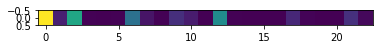

In [ ]:
plt.imshow(prob)

In [ ]:
dfp=df[['label','author','age']].drop_duplicates().sort_values(by=['author'])
dfp['Probability of belonging'] = prob[0]
dfp.sort_values(by=['Probability of belonging'],ascending=False)

label                author                age  Probability of belonging
14      1  AMMIANVS MARCELLINVS   4th century A.D.                  0.318907
3       3               AUGUTUS  63 B.C. – A.D. 14                  0.188988
31      7                JUSTIN   3RD CENTURY A.D.                  0.155302
15      8                CICERO        106-43 B.C.                  0.119704
12     22      VALERIUS MAXIMUS   1ST CENTURY A.D.                  0.044463
40     11                FLORUS   2ND CENTURY A.D.                  0.042873
10     18               SALLUST          86-34 B.C                  0.035313
48      2              APVLEIVS   4th century A.D.                  0.027792
9      12             FRONTINUS      C.40-103 A.D.                  0.024818
6       9         CURTIUS RUFUS   1ST CENTURY A.D.                  0.017674
0      23                 VARRO        116-27 B.C.                  0.006860
7      19          SENECA MAIOR    54 B.C.-39 A.D.                  0.003214
19     10             EUTROPIUS   4TH CENTURY A.D.                  0.002611
36     14                  LIVY    59 B.C-A.D. 17.                  0.002597
43      6                  CATO        234-149 B.C                  0.002197
50      5       AURELIUS VICTOR   4th century A.D.                  0.001692
24     21               TACITUS  C.56 - C.117 A.D.                  0.001205
13     13               GELLIUS   4TH CENTURY A.D.                  0.001168
5       4                CAESAR      100 – 44 B.C.                  0.000764
1      20          SENECA MINOR   C.4 B.C.-A.D. 65                  0.000719
42     16           PLINY MINOR      63-C.113 A.D.                  0.000583
2      15                 NEPOS      C.100-24 B.C.                  0.000323
4      17            QUINTILIAN  C. 69 - AFTER 130                  0.000231

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(prob,vmin=0, vmax=1,xticklabels=ll)

# Network of authors

In [ ]:
#we consider the k_means centers
kmeans = KMeans(n_clusters=len(os.listdir(source)), random_state=0).fit(X)
cen=kmeans.cluster_centers_
np.shape(cen)
cos=pd.DataFrame(metrics.pairwise.cosine_similarity(cen))
plt.imshow(cos.to_numpy())

(23, 768)

In [ ]:
#rescale
cos=scaler.fit_transform(cos)
cos=MinMaxScaler().fit_transform(cos)
plt.imshow(cos)

In [ ]:
#dimensionality reduction with UMAP and graphical representation - plot 1
mapper = umap.UMAP(random_state=42, n_components=2, min_dist=0.9, metric='euclidean', n_neighbors=3).fit(cen)
#position - the same as umap
p=mapper.transform(cen)
#plot
umap.plot.points(mapper, labels=np.array(list(auth_unique)))

In [ ]:
li=[]
col=[]

N=np.shape(cos)[0]

for i in range(N):
    for j in range(N):
      if cos[i][j]!=0:
        li.append([i,j,cos[i][j]])

for i in range(len(li)):
    col.append(li[i][2])

G1 = nx.DiGraph() 
G1.add_weighted_edges_from(li)

In [ ]:
#Plotting network with colormap based on cosine similarity
plt.figure(figsize=(12, 13))

vmin = np.min(np.array(cos))
vmax = np.max(np.array(cos))

edge=nx.draw_networkx_edges(G1, p, alpha=0.8, edge_color=col, width=0.2,  edge_vmin=vmin, edge_vmax=vmax, edge_cmap=plt.cm.cool) 

nx.draw_networkx_nodes(G1, p, node_size=50.0, node_color=range(len(auth_unique)), alpha=0.8)  


sm = plt.cm.ScalarMappable(cmap=plt.cm.cool) #, norm=plt.Normalize(vmin=vmin, vmax=vmax)
sm.set_array([])
cbar = plt.colorbar(sm,shrink=0.65, label="cosine similarity")

plt.scatter(p[:,0], p[:,1])
n=auth_unique
for i, txt in enumerate(n):
    plt.annotate(txt, (p[i,0], p[i,1]))

plt.axis('off')
plt.show()

In [ ]:
cos[cos < .4] = 0
li=[]
col=[]

N=np.shape(cos)[0]

for i in range(N):
    for j in range(N):
      if cos[i][j]!=0:
        li.append([i,j,cos[i][j]])

for i in range(len(li)):
    col.append(li[i][2])

G1 = nx.DiGraph() 
G1.add_weighted_edges_from(li)

#Plotting network with colormap based on cosine similarity
plt.figure(figsize=(12, 13))

vmin = np.min(np.array(cos))
vmax = np.max(np.array(cos))

edge=nx.draw_networkx_edges(G1, p, alpha=0.8, edge_color=col, width=0.2,  edge_vmin=vmin, edge_vmax=vmax, edge_cmap=plt.cm.cool) 

nx.draw_networkx_nodes(G1, p, node_size=50.0, node_color=range(len(auth_unique)), alpha=0.8)  


sm = plt.cm.ScalarMappable(cmap=plt.cm.cool) #, norm=plt.Normalize(vmin=vmin, vmax=vmax)
sm.set_array([])
cbar = plt.colorbar(sm,shrink=0.65, label="cosine similarity")

plt.scatter(p[:,0], p[:,1])
n=auth_unique
for i, txt in enumerate(n):
    plt.annotate(txt, (p[i,0], p[i,1]))

plt.axis('off')
plt.show()